# Handin exercise for week 5: Pandas

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://api.statbank.dk/console#tables 
3. In the console at pt 1: choose 'Retrieve tables' pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data' pt 2: get request and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married'?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)
  
## Ex2 Use another table
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

In [57]:
import pandas as pd 
import matplotlib.pyplot as plt

In [59]:
url = 'https://api.statbank.dk/v1/tables'
dst = pd.read_json(url)
dst.to_csv('dk-stat-all-tables.csv', encoding='utf-8', index=False)
dst[:20]


,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,FOLK1A,Folketal den 1. i kvartalet,antal,2020-08-11T08:00:00,2008K1,2020K3,True,"[område, køn, alder, civilstand, tid]"
1,FOLK1B,Folketal den 1. i kvartalet,antal,2020-08-11T08:00:00,2008K1,2020K3,True,"[område, køn, alder, statsborgerskab, tid]"
2,FOLK1C,Folketal den 1. i kvartalet,antal,2020-08-11T08:00:00,2008K1,2020K3,True,"[område, køn, alder, herkomst, oprindelsesland..."
3,FOLK1D,Folketal den 1. i kvartalet,antal,2020-08-11T08:00:00,2008K1,2020K3,True,"[område, køn, alder, statsborgerskab, tid]"
4,FOLK1E,Folketal den 1. i kvartalet,antal,2020-08-11T08:00:00,2008K1,2020K3,True,"[område, køn, alder, herkomst, tid]"
5,FOLK2,Folketal 1. januar,antal,2020-02-11T08:00:00,1980,2020,True,"[alder, køn, herkomst, statsborgerskab, oprind..."
6,FOLK3,Folketal 1. januar,antal,2020-02-11T08:00:00,2008,2020,True,"[fødselsdag, fødselsmåned, fødselsår, tid]"
7,FT,Folketal (summariske tal fra folketællinger),antal,2020-02-11T08:00:00,1769,2020,True,"[hovedlandsdele, tid]"
8,BEF5F,Personer født på Færøerne og bosat i Danmark 1...,antal,2020-02-11T08:00:00,2008,2020,True,"[køn, alder, forældrenes fødested, tid]"
9,BEF5G,Personer født i Grønland og bosat i Danmark 1....,antal,2020-02-11T08:00:00,2008,2020,True,"[køn, alder, forældrenes fødested, tid]"


In [60]:
divorce_url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&CIVILSTAND=F&Tid=2008K4%2C2020K3"
df1 = pd.read_csv(divorce_url, sep=";")
end_2008 = (df1.loc[df1["TID"].str.contains("2008K4")]).iloc[:,2]
end_2020 = (df1.loc[df1["TID"].str.contains("2020K3")]).iloc[:,2]
print("Divorces at Q4 of 2008:", end_2008.iloc[0])
print("Divorces at Q3 of 2020:", end_2020.iloc[0])
diff = ((end_2020.iloc[0] / end_2008.iloc[0]) -1) * 100
print(f"Increase in divorces from 2008 to 2020: %d%%" % diff)

Divorces at Q4 of 2008: 432156
Divorces at Q3 of 2020: 550715
Increase in divorces from 2008 to 2020: 27%


In [61]:
ugift_url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=U%2CTOT"
df2 = pd.read_csv(ugift_url, sep=";")
areas = df2[df2["OMRÅDE"].str.startswith("0") == False]
total = areas[areas["CIVILSTAND"] == "TOT I alt"]
not_married = areas[areas["CIVILSTAND"] != "TOT I alt"]
merged = pd.merge(total,not_married, on="OMRÅDE")
per_dict = dict.fromkeys(merged["OMRÅDE"])
for key in per_dict:
        area = merged[merged["OMRÅDE"] == key]        
        value = (area["INDHOLD_y"].iloc[0] / area["INDHOLD_x"].iloc[0])* 100 
        per_dict[key] = value

sorted_per_dict = sorted(per_dict.items(), key=lambda kv: kv[1], reverse=True)
for (key,value) in sorted_per_dict[:5]:
    print(key, value)

101 København 65.43366480526353
751 Aarhus 59.65950554183491
147 Frederiksberg 58.39720317332257
461 Odense 55.037661563712035
851 Aalborg 54.61815973053066


&lt;AxesSubplot:&gt;

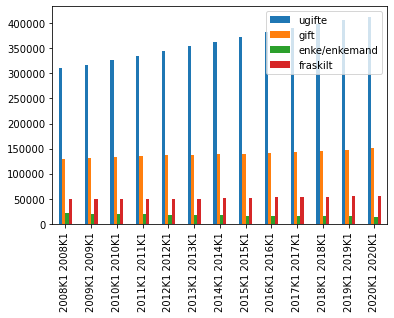

In [62]:
civil_status_url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&OMR%C3%85DE=101&Tid=*&CIVILSTAND=U%2CG%2CE%2CF"
df3 = pd.read_csv(civil_status_url, sep=";")
k1 = df3[df3["TID"].str.endswith("K1")]

index = k1["TID"].unique()
ugifte = list(k1[k1["CIVILSTAND"] == "U Ugift"]["INDHOLD"][:])
gift = list(k1[k1["CIVILSTAND"] == "G Gift/separeret"]["INDHOLD"][:])
enke = list(k1[k1["CIVILSTAND"] == "E Enke/enkemand"]["INDHOLD"][:])
fraskilt = list(k1[k1["CIVILSTAND"] == "F Fraskilt"]["INDHOLD"][:])
dt = pd.DataFrame(
    {
        "ugifte":ugifte,
        "gift":gift,
        "enke/enkemand":enke,
        "fraskilt":fraskilt
    }, index=index)
dt.plot.bar()

&lt;BarContainer object of 126 artists&gt;

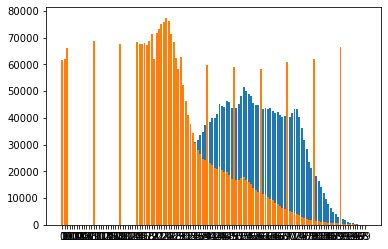

In [63]:
# Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

api_url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=*&CIVILSTAND=U%2CG&ALDER=*"
df4 = pd.read_csv(api_url, sep=";")

gift = (df4.loc[df4["CIVILSTAND"].str.contains("Gift") & ~df4["ALDER"].str.contains("alt") & df4["TID"].str.contains("2020K1")].groupby("ALDER").sum()).to_dict()
ugift = (df4.loc[df4["CIVILSTAND"].str.contains("Ugift") & ~df4["ALDER"].str.contains("alt") & df4["TID"].str.contains("2020K1")].groupby("ALDER").sum()).to_dict() 

gift = {k.split(" ")[0]:gift["INDHOLD"][k] for k in gift["INDHOLD"]}
ugift = {k.split(" ")[0]:ugift["INDHOLD"][k] for k in ugift["INDHOLD"]}
plt.bar(gift.keys(),gift.values())
plt.bar(ugift.keys(),ugift.values())

[&lt;matplotlib.lines.Line2D at 0x154dd268&gt;]

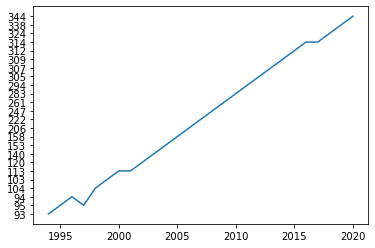

In [80]:
url = "https://api.statbank.dk/v1/data/SKIB11/CSV?delimiter=Semicolon&SKIBTYPE=*&SKIBREG=1003&ENHED=6000&Tid=*"
df = pd.read_csv(url, sep=";")

# 1. Ændringen i antallet af fritidsskibe fra 1994 til 2020
year_count = df.loc[df["SKIBTYPE"] == "Fritidsskibe"][["TID","INDHOLD"]]
years = df.loc[df["SKIBTYPE"] == "Fritidsskibe"]["TID"]
count = df.loc[df["SKIBTYPE"] == "Fritidsskibe"]["INDHOLD"]
year_count = year_count[4:]
plt.plot(year_count["TID"], year_count["INDHOLD"])

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;)])

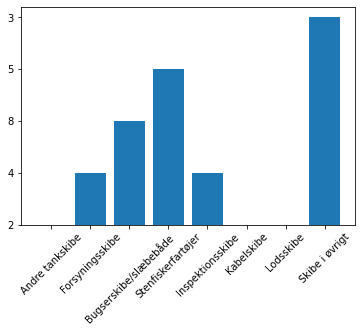

In [103]:
# 2  Antal for hver type af skibe i 2020 med hjemsted i Danmark, fjern skibstyper der ikke forekommer.
import re
grp = df.loc[(df["TID"] == 2020) & (~df["SKIBTYPE"].str.contains("SKIBE I ALT|LASTSKIBE I ALT", flags=re.I, regex=True) & (~df["INDHOLD"].str.contains("..| |0", flags=re.I, regex=True)))]
plt.bar(grp["SKIBTYPE"], grp["INDHOLD"])
plt.xticks(rotation=45)
ply.yticks()